# PART 1

1. Import libraries and Data
2. Security implications and addressing PII data
3. Regional segmentation
4. Exclusion of low-activity customer
5. Customer Profiling
6. Aggregating the max, mean, and min on a customer-profile level for usage frequency and expenditure
7. Comparing customer profiles with regions
8. Comparing customer profiles with departments
9. Additional Graphs for project analysis

# 01. Import Libraries and Data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [5]:
# Turn project folder path into a string
path = r'C:\Users\marze\CF Projects\08-2024 Instacart Basket Analysis'

In [6]:
# importing dataframe
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

# 02. Security implications and addressing PII data

In [8]:
cust_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   product_id                  int64  
 1   product_name                object 
 2   aisle_id                    int64  
 3   department_id               int64  
 4   prices                      float64
 5   order_id                    int64  
 6   user_id                     object 
 7   order_number                int64  
 8   orders_day_of_week          int64  
 9   order_hour_of_day           int64  
 10  days_since_prior_order      float64
 11  first_order                 bool   
 12  add_to_cart_order           int64  
 13  reordered                   int64  
 14  price_range_loc             object 
 15  busiest_day                 object 
 16  busiest_days                object 
 17  busiest_period_of_day       object 
 18  max_order                   int64  
 19  loyalty_flag       

The sensitive information in our dataframe is first and last name, gender, state, age and marital status. Before proceeding with the analysis, client should be consulted as it can pose security implications. The data can be masked or anonymized. 

In [10]:
# remove first and last name columns
cust_ords_prods = cust_ords_prods.drop(columns=['first_name','last_name'])

In [11]:
cust_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Low spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


# 03. Regional segmentation

In [13]:
# Define regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'] 
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska','Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Create a result list for the 'state' column  showing its corresponding region
result = []

for value in cust_ords_prods['state']: 
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')
    else:
       result.append('No region assigned')

In [15]:
cust_ords_prods['region'] = result

In [16]:
cust_ords_prods.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region'],
      dtype='object')

In [17]:
# crossing the region column with the spending flag
crosstab = pd.crosstab(cust_ords_prods['region'], cust_ords_prods['spending_flag'], dropna = False)

In [18]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


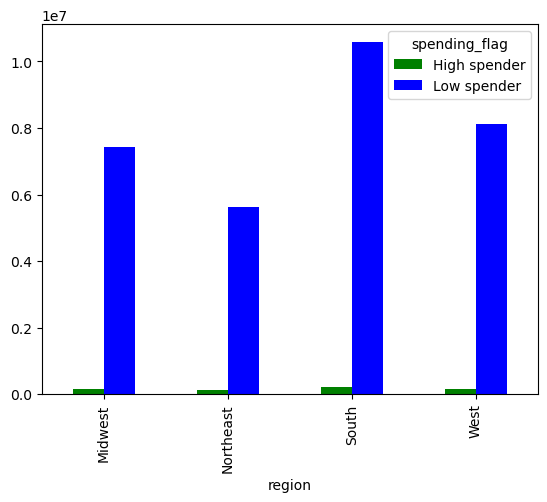

In [19]:
# create bar chart showing the difference in spending habits
region_based_spending = crosstab.plot.bar(color = ['green', 'blue'])

In [20]:
# export the bar chart
region_based_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending_habits.png'))

# 04. Exclusion of low-activity customers

In [22]:
# create function determining low and high activity customers
result = []

for value in cust_ords_prods['max_order']:
    if value < 5:
        result.append('low-activity customer')
    else: 
        result.append('high-activity customer')

In [23]:
#creating a new 'activity_level' column
cust_ords_prods['activity_level'] = result

In [24]:
# count number of each activity level
cust_ords_prods['activity_level'].value_counts()

activity_level
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [25]:
# exclude customers with less than 5 orders
cust_ords_prods_excluded = cust_ords_prods[cust_ords_prods['activity_level'] != 'low-activity customer']

In [26]:
# export data
cust_ords_prods_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_excluded.pkl'))

# 05. Customer profiling

1. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
2. Analysis of “orders_day_of_week” and “order_hour_of_day” based on customer profiles.

In [29]:
cust_ords_prods_excluded.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_price,median_days_between_orders,age,number_of_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,2.559850e+04,7.118859e+01,9.922365e+00,1.193352e+01,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,3.442569e+01,1.193352e+01,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.408096e+04,3.822194e+01,6.282441e+00,4.913444e+02,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,2.489504e+01,7.992284e+01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


#### Profiling based on Age

In [31]:
cust_ords_prods_excluded['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [32]:
# creating 'Young Adult' age group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['age']<=25,'age_group']='Young Adult'

C:\Users\marze\AppData\Local\Temp\ipykernel_3556\3181027934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_ords_prods_excluded.loc[cust_ords_prods_excluded['age']<=25,'age_group']='Young Adult'


In [33]:
# creating 'Adult' age group
cust_ords_prods_excluded.loc[(cust_ords_prods_excluded['age']>=26) & (cust_ords_prods_excluded['age']<=44),'age_group']='Adult'

In [34]:
# creating 'Middle-Age Adult' age group
cust_ords_prods_excluded.loc[(cust_ords_prods_excluded['age']>=45) & (cust_ords_prods_excluded['age']<=64),'age_group']='Middle-Age Adult'

In [35]:
# creating 'Senior' age group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['age']>=65,'age_group']='Senior'

In [36]:
cust_ords_prods_excluded['age_group'].value_counts()

age_group
Middle-Age Adult    9690051
Adult               9214451
Senior              8195544
Young Adult         3864518
Name: count, dtype: int64

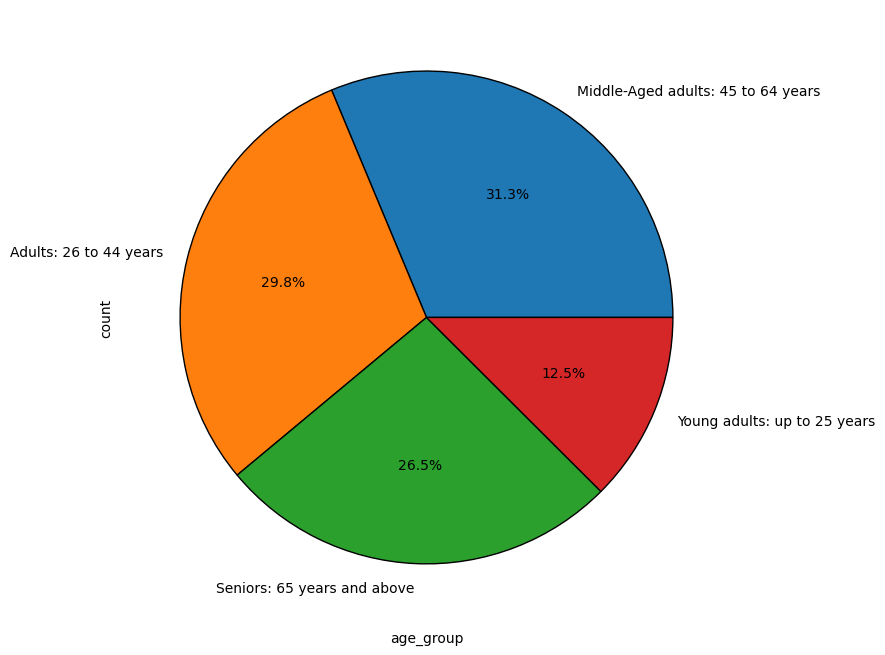

In [385]:
# Creating Pie Chart of Age Groups
age_group_counts = cust_ords_prods_excluded['age_group'].value_counts()

# Plot the pie chart
age_group_counts.plot(figsize=(12, 8))
age_group_pie_chart = age_group_counts.plot.pie(
    labels=['Middle-Aged adults: 45 to 64 years', 'Adults: 26 to 44 years','Seniors: 65 years and above','Young adults: up to 25 years'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'}
)

In [387]:
# Exporting Age Group Pie Chart
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_pie_chart.png'))

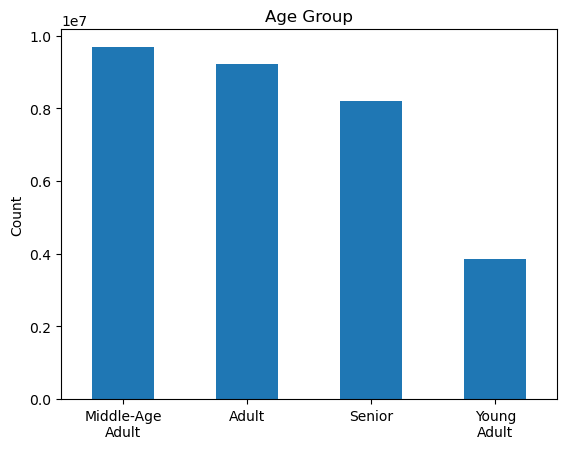

In [373]:
import matplotlib.pyplot as plt
import textwrap

age_group_bar = age_group_counts.plot.bar()
plt.title('Age Group')
plt.xlabel('')
plt.ylabel('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in age_group_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
age_group_bar.set_xticklabels(wrapped_labels, rotation=0)

plt.tight_layout
plt.show()

In [375]:
#Exporting the bar graph
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_bar_chart.png'))

#### Profiling based on Income

In [42]:
cust_ords_prods_excluded['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [43]:
cust_ords_prods_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity_level,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity customer,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity customer,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,high-activity customer,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Female,Hawaii,51,1/4/2019,2,married,57797,West,high-activity customer,Middle-Age Adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,high-activity customer,Young Adult


In [44]:
#Creating 'low income' group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['income']<=65000,'income_group']='Low Income'

C:\Users\marze\AppData\Local\Temp\ipykernel_3556\4056879043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_ords_prods_excluded.loc[cust_ords_prods_excluded['income']<=65000,'income_group']='Low Income'


In [45]:
#creating 'middle class' group
cust_ords_prods_excluded.loc[(cust_ords_prods_excluded['income']>65000) & (cust_ords_prods_excluded['income']<=130000),'income_group']='Middle Class'

In [46]:
#Creating 'Upper class' group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['income']>130000,'income_group']='Upper Class'

In [47]:
cust_ords_prods_excluded['income_group'].value_counts()

income_group
Middle Class    16455313
Upper Class      7401414
Low Income       7107837
Name: count, dtype: int64

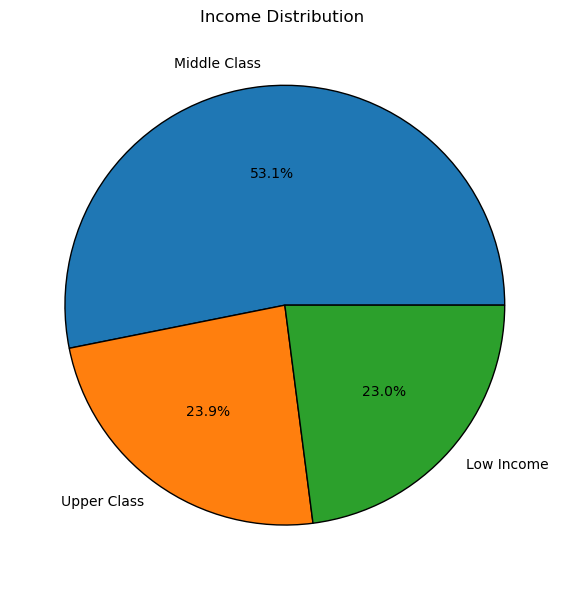

In [48]:
#creating a pie chart of Income group
income_group_counts = cust_ords_prods_excluded['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Distribution ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [49]:
# Exporting Income Distribution Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_distribution_pie.png'))

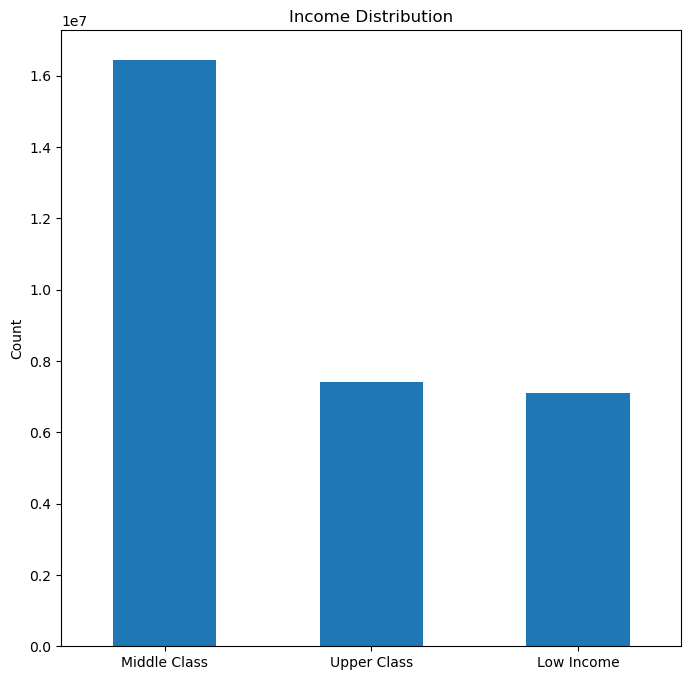

In [50]:
# Creating Bar Chart of Income Distribution
income_group_counts = cust_ords_prods_excluded['income_group'].value_counts()
plt.figure(figsize=(8,8))
income_group_bar=income_group_counts.plot.bar(rot=0)
plt.title('Income Distribution')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [51]:
#Exporting Income Distribution bar graph
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_distribution_bar.png'))

#### Profiling based on Number of Dependents

In [53]:
cust_ords_prods_excluded['number_of_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependents, dtype: float64

In [54]:
# creating 'low number of dependents' group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['number_of_dependents']<=1,'dependents_group']='Low'

C:\Users\marze\AppData\Local\Temp\ipykernel_3556\270228132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_ords_prods_excluded.loc[cust_ords_prods_excluded['number_of_dependents']<=1,'dependents_group']='Low'


In [55]:
# creating 'Average number of dependents' group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['number_of_dependents']==2,'dependents_group']='Average'

In [56]:
# creating 'Large number of dependents' group
cust_ords_prods_excluded.loc[cust_ords_prods_excluded['number_of_dependents']>=3,'dependents_group']='Large'

In [57]:
cust_ords_prods_excluded['dependents_group'].value_counts()

dependents_group
Low        15458787
Large       7772516
Average     7733261
Name: count, dtype: int64

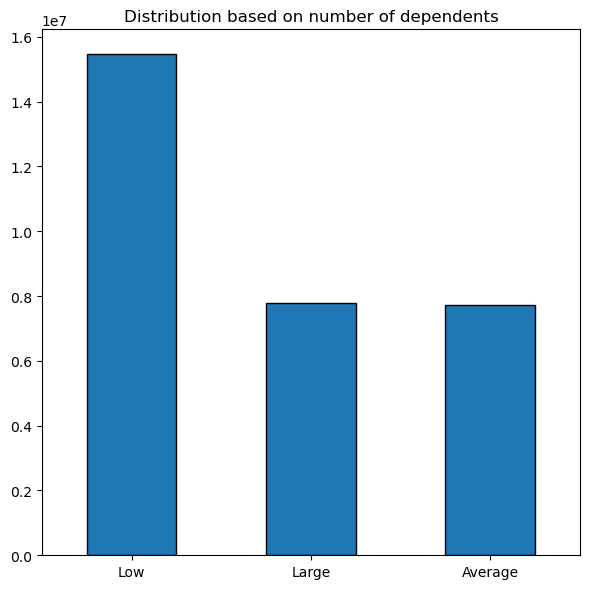

In [58]:
# Creating a bar chart of dependents groups
dependents_group_counts = cust_ords_prods_excluded['dependents_group'].value_counts()
plt.figure(figsize=(6,6))
dependent_category_bar = dependents_group_counts.plot.bar(edgecolor='black', rot=0)
plt.title('Distribution based on number of dependents')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [59]:
# Exporting distribution of dependents bar graph
dependent_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependent_distribution_bar.png'))

#### Profiling based on orders_day_of_week

In [61]:
cust_ords_prods_excluded['orders_day_of_week'].describe()

count    3.096456e+07
mean     2.741397e+00
std      2.089254e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: orders_day_of_week, dtype: float64

In [62]:
# Creating names for days of the week corresponding to the numbers
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

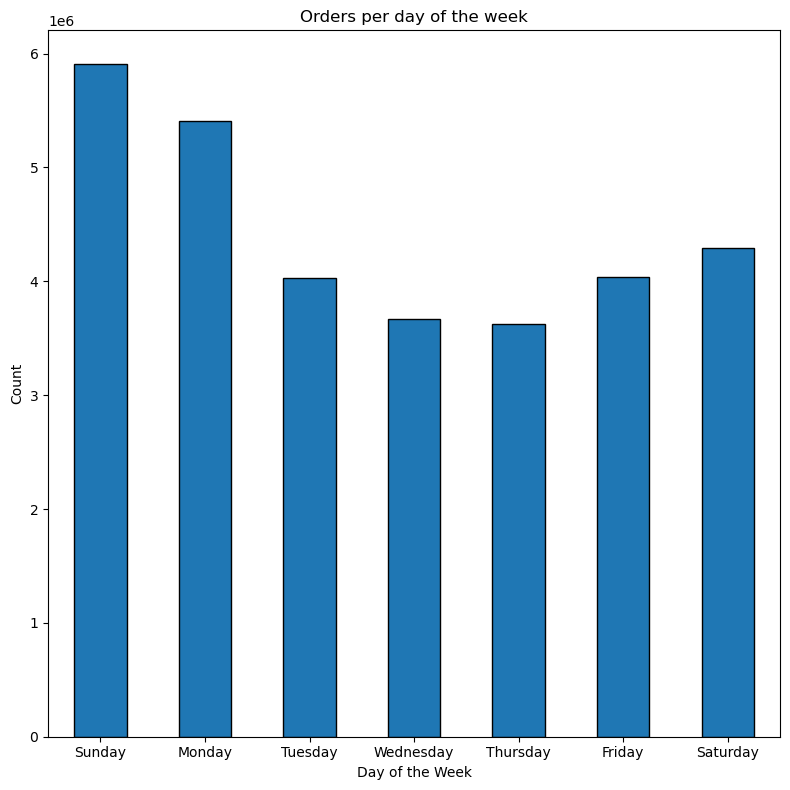

In [63]:
# Creating Bar graph
plt.figure(figsize=(8, 8))
ords_day_of_week = cust_ords_prods_excluded['orders_day_of_week'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders per day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [64]:
# Exporting orders by day of the week bar graph
ords_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_day_of_week_bar.png'))

### Profiling based on orders per weekday/weekend

In [66]:
# creating for loop to determine if day of the week is weekday or weekend
result = []

for orders_day_of_week in cust_ords_prods_excluded['orders_day_of_week']: 
    if orders_day_of_week in [0, 6]:  # 0 and 6 represent Sunday and Saturday respectively
        result.append('Weekend')
    elif orders_day_of_week in [1, 2, 3, 4, 5]:  # 1-5 represent the weekday days
        result.append('Weekday')
    else:
        result.append('No day assigned')

cust_ords_prods_excluded['order_dow_weekend'] = result
cust_ords_prods_excluded['order_dow_weekend'].value_counts()


C:\Users\marze\AppData\Local\Temp\ipykernel_3556\303149711.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_ords_prods_excluded['order_dow_weekend'] = result


order_dow_weekend
Weekday    20764650
Weekend    10199914
Name: count, dtype: int64

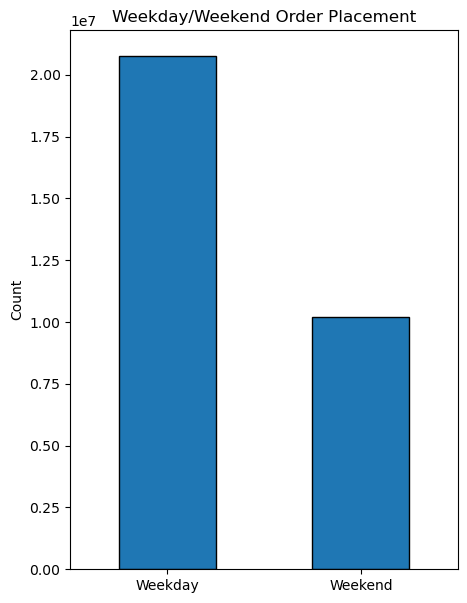

In [67]:
# Creating bar graph of Weekday Order Groups
order_dow_weekend_count = cust_ords_prods_excluded['order_dow_weekend'].value_counts()
plt.figure(figsize=(5,7))
order_dow_weekend_count_bar = order_dow_weekend_count.plot.bar(edgecolor='black', rot=0)
plt.title('Weekday/Weekend Order Placement')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [68]:
# exporting bar graph for weekday/weekend order placement
order_dow_weekend_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ords_weekday_weekend_bar.png'))

### Profiling based on order_hour_of_day

In [70]:
cust_ords_prods_excluded['order_hour_of_day'].describe()

count    3.096456e+07
mean     1.341098e+01
std      4.248845e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

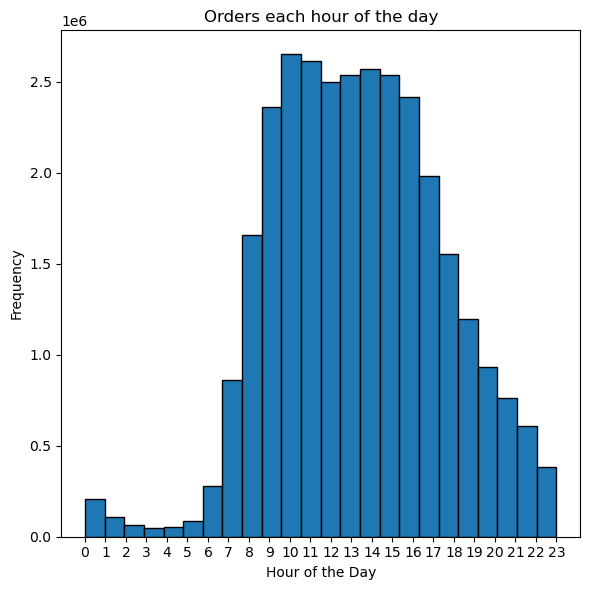

In [71]:
plt.figure(figsize=(6, 6))
ords_hour_of_day=cust_ords_prods_excluded['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders each hour of the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [72]:
#exporting histogram of orders each hour of the day
ords_hour_of_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_hour_of_day_hist.png'))

### Profiling based on marital status

In [74]:
cust_ords_prods_excluded['marital_status'].value_counts()

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [75]:
# Define get_dependents
def get_dependents(number_of_dependents):
    if number_of_dependents > 0:
        return 'Has dependents'
    else:
        return 'No dependents'

# Apply the dependents_flag function
cust_ords_prods_excluded['dependents_flag'] = cust_ords_prods_excluded['number_of_dependents'].apply(get_dependents)

C:\Users\marze\AppData\Local\Temp\ipykernel_3556\3537448185.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_ords_prods_excluded['dependents_flag'] = cust_ords_prods_excluded['number_of_dependents'].apply(get_dependents)


In [76]:
cust_ords_prods_excluded['dependents_flag'].value_counts()

dependents_flag
Has dependents    23224883
No dependents      7739681
Name: count, dtype: int64

In [77]:
# Define function to create profiles
def create_profile(row):
    return f"{row['marital_status']}, {row['dependents_flag']}"

# Apply the function to create a new column 'customer_profile'
cust_ords_prods_excluded['customer_profile'] = cust_ords_prods_excluded.apply(create_profile, axis=1)

C:\Users\marze\AppData\Local\Temp\ipykernel_3556\3222472318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_ords_prods_excluded['customer_profile'] = cust_ords_prods_excluded.apply(create_profile, axis=1)


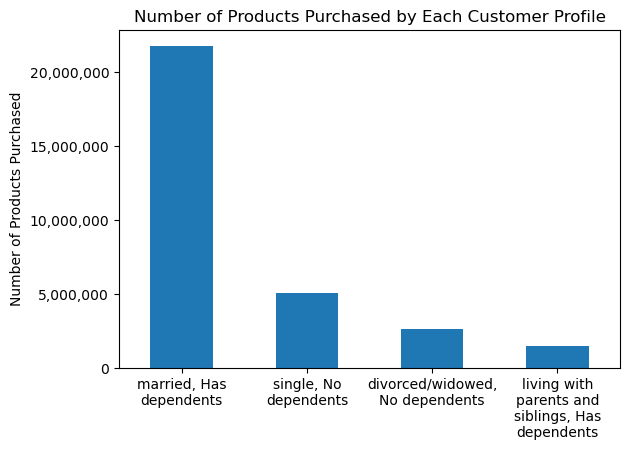

In [78]:
import textwrap
# Create chart showing distribution of customers by 'customer_profile'
counts = cust_ords_prods_excluded['customer_profile'].value_counts()
ax = counts.plot.bar()

plt.title('Number of Products Purchased by Each Customer Profile')
plt.xlabel(' ')
plt.ylabel('Number of Products Purchased')


# Format y-axis values
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

# Wrap text labels
labels = [textwrap.fill(label, width=17) for label in counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, ha='center')
plt.tight_layout() 

bar_customer_profile = plt.gcf()

In [79]:
#exporting histogram
ax.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_profile_bar.png'))

### Marital status vs. Age Group

In [81]:
crosstab_family = pd.crosstab(cust_ords_prods_excluded['marital_status'], cust_ords_prods_excluded['age_group'], dropna = False)

In [82]:
print(crosstab_family)

age_group                           Adult  Middle-Age Adult   Senior  \
marital_status                                                         
divorced/widowed                        0            623313  2021958   
living with parents and siblings        0                 0        0   
married                           6901266           7238740  6173586   
single                            2313185           1827998        0   

age_group                         Young Adult  
marital_status                                 
divorced/widowed                            0  
living with parents and siblings      1481172  
married                               1430119  
single                                 953227  


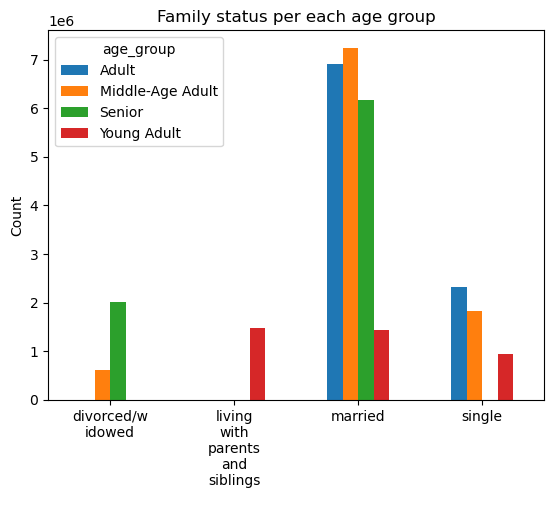

In [83]:
family_based_spending = crosstab_family.plot.bar()
plt.title('Family status per each age group')
plt.xlabel(' ')
plt.ylabel('Count')

# Get the current x-tick labels
labels = [label.get_text() for label in family_based_spending.get_xticklabels()]

# Wrap labels
wrapped_labels = [textwrap.fill(label, 10) for label in labels]

# Set the new wrapped labels
family_based_spending.set_xticklabels(wrapped_labels, rotation=0)

# Show the plot
plt.show()

In [84]:
#exporting the chart
family_based_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_based_spending.png'))

# 06. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [86]:
cust_ords_prods_excluded.columns.to_list()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'first_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_price',
 'spending_flag',
 'median_days_between_orders',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependents',
 'marital_status',
 'income',
 'region',
 'activity_level',
 'age_group',
 'income_group',
 'dependents_group',
 'order_dow_weekend',
 'dependents_flag',
 'customer_profile']

In [87]:
# Creating aggregation subset of customer profile
cust_profile_agg=cust_ords_prods_excluded.groupby(['user_id', 'gender', 'state', 'number_of_dependents', 'marital_status', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'frequency_flag', 'age_group', 'income_group', 'region', 'dependents_group', 'spending_flag'])['prices'].sum().reset_index()

In [88]:
cust_profile_agg.head()

,user_id,gender,state,number_of_dependents,marital_status,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,frequency_flag,age_group,income_group,region,dependents_group,spending_flag,prices
0,1,Female,Alabama,3,married,1,2,8,New customer,Non-frequent customer,Adult,Low Income,South,Large,Low spender,31.6
1,1,Female,Alabama,3,married,2,3,7,New customer,Non-frequent customer,Adult,Low Income,South,Large,Low spender,35.4
2,1,Female,Alabama,3,married,3,3,12,New customer,Non-frequent customer,Adult,Low Income,South,Large,Low spender,28.2
3,1,Female,Alabama,3,married,4,4,7,New customer,Non-frequent customer,Adult,Low Income,South,Large,Low spender,26.0
4,1,Female,Alabama,3,married,5,4,15,New customer,Non-frequent customer,Adult,Low Income,South,Large,Low spender,57.0


In [89]:
# Creating subset of user focused breakdown
customer_agg = cust_profile_agg.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'orders_day_of_week': ['max', 'min', 'mean'], 
                                                    'order_hour_of_day': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [90]:
customer_agg

order_number           orders_day_of_week                \
                 max min  mean                max min      mean   
user_id                                                           
1                 10   1   5.5                  4   1  2.500000   
10                 5   1   3.0                  5   2  3.600000   
100                5   1   3.0                  5   0  2.400000   
1000               7   1   4.0                  6   0  2.428571   
10000             72   1  36.5                  6   0  2.722222   
...              ...  ..   ...                ...  ..       ...   
99994             11   1   6.0                  6   0  4.909091   
99995              5   1   3.0                  6   0  2.600000   
99996             12   1   6.5                  5   1  2.250000   
99998              5   1   3.0                  6   1  2.000000   
99999             34   1  17.5                  6   0  2.441176   

        order_hour_of_day                prices                     
                      max min       mean    max    min        mean  
user_id                                                             
1                      16   7  10.300000   63.1   25.0   37.570000  
10                     20  14  16.600000  429.6   39.1  247.420000  
100                    20  15  17.600000   97.6   23.4   53.240000  
1000                   18  14  16.428571  134.4  112.9  123.714286  
10000                  22   5  11.375000  298.2   11.8  122.022222  
...                   ...  ..        ...    ...    ...         ...  
99994                  20   7  11.363636  174.0   86.2  126.800000  
99995                  19  12  14.200000  132.5   42.6   79.580000  
99996                  13   8  10.500000  127.1    2.8   79.050000  
99998                  17   9  11.400000   51.2   20.8   38.020000  
99999                  23   7  14.647059  159.7    6.7   70.541176  

[162631 rows x 12 columns]

In [91]:
# Creating aggregation by income_group for order_number & prices
income_group_agg = cust_profile_agg.groupby('income_group').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

In [92]:
income_group_agg

order_number                   prices                 
                      max min       mean       max  min        mean
income_group                                                       
Low Income             99   1  17.181007   15298.4  1.0   64.118346
Middle Class           99   1  18.161922  100384.5  1.0   97.682868
Upper Class            99   1  18.244945  100452.9  1.0  236.148194

In [93]:
# Creating aggregation by dependent_category for order_number & prices
dependent_size_agg = cust_profile_agg.groupby('dependents_group').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

In [94]:
dependent_size_agg

order_number                   prices                 
                          max min       mean       max  min        mean
dependents_group                                                       
Average                    99   1  17.844847  100452.9  1.0  124.444126
Large                      99   1  17.976402  100330.2  1.0  119.089534
Low                        99   1  17.936360  100442.8  1.0  119.411897

# 07. Comparing customer profiles with regions

In [96]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison=pd.crosstab(cust_ords_prods_excluded['age_group'],cust_ords_prods_excluded['region'],dropna=False)

In [179]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Adult,2172833,1602358,3092723,2346537
Middle-Age Adult,2286479,1697611,3194966,2510995
Senior,1904046,1484807,2708461,2098230
Young Adult,898155,679909,1314989,971465


<Figure size 1000x700 with 0 Axes>

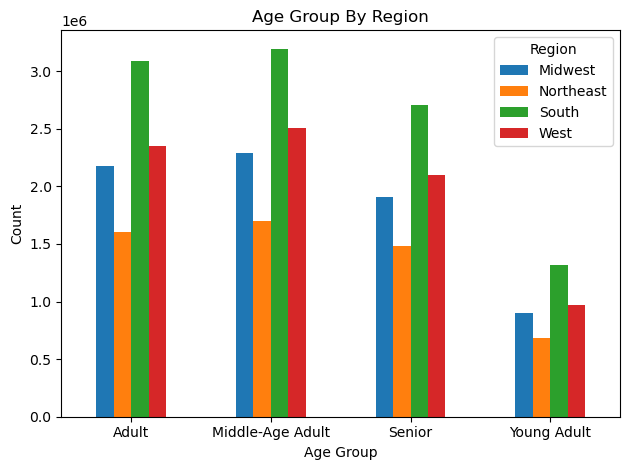

In [183]:
# Creating bar graph to show comparison between age_group and region
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [187]:
# Exporting Age Group By Region bar graph
age_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_comparison_bar.png'))

In [189]:
# Creating crosstab to compare age_group with frequency_flag
age_customer_frequency_comparison = pd.crosstab(cust_ords_prods_excluded['age_group'], cust_ords_prods_excluded['frequency_flag'])

In [191]:
age_customer_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,6309385,848176,2056890
Middle-Age Adult,6610186,928228,2151637
Senior,5630976,760132,1804436
Young Adult,2653929,358439,852150


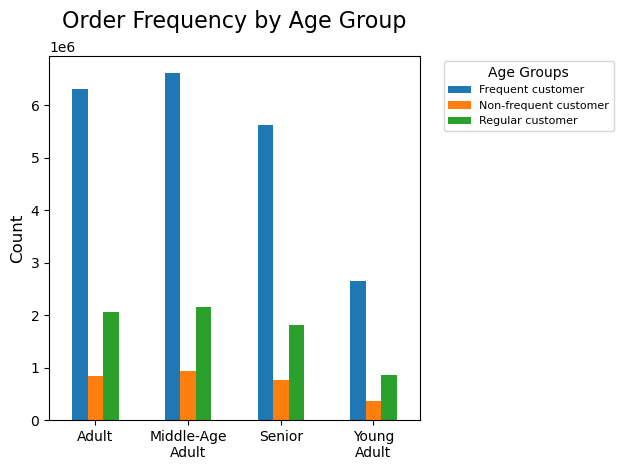

In [193]:
# create bar graph
age_cust_freq_bar = age_customer_frequency_comparison.plot.bar()

plt.title('Order Frequency by Age Group', fontsize=16, pad=20)  # Increase title font size and padding
plt.xlabel('', fontsize=12)  # Increase x-label font size
plt.ylabel('Count', fontsize=12)  # Increase y-label font size

labels = [label.get_text() for label in age_cust_freq_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
age_cust_freq_bar.set_xticklabels(wrapped_labels, rotation=0, fontsize=10)  # Increase x-tick font size

plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)  # Increase legend font size

plt.tight_layout()  # Adjust the layout

plt.show()

In [195]:
# Exporting customer frequency by age bar graph
age_cust_freq_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_cust_freq_bar.png'))

In [197]:
# Creating crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(cust_ords_prods_excluded['age_group'],cust_ords_prods_excluded['loyalty_flag'],dropna=False)

In [199]:
age_group_loyalty_comparison

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Adult,3048175,1420508,4745768
Middle-Age Adult,3231509,1506670,4951872
Senior,2723958,1276659,4194927
Young Adult,1280451,599858,1984209


<Figure size 1000x700 with 0 Axes>

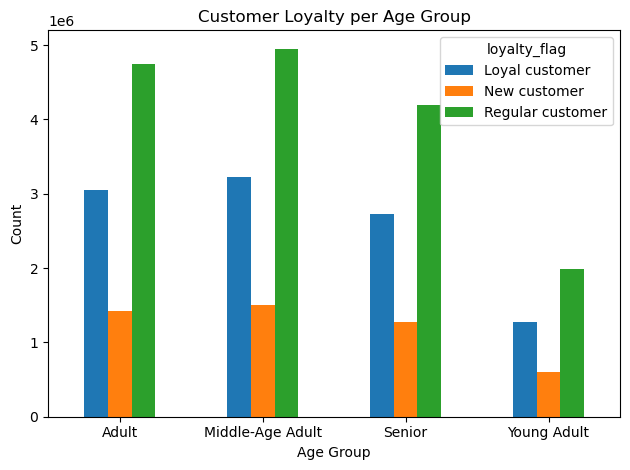

In [201]:
# Creating bar graph for customer loyalty by age group
plt.figure(figsize=(10, 7))
age_group_loaylty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Customer Loyalty per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [203]:
# Exporting bar graph
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_loaylty_comparison_bar.png'))

In [205]:
cust_ords_prods_excluded['income_group'].value_counts(dropna=False)

income_group
Middle Class    16455313
Upper Class      7401414
Low Income       7107837
Name: count, dtype: int64

In [207]:
# creating crosstab between income_group and region
income_region_comparison=pd.crosstab(cust_ords_prods_excluded['income_group'],cust_ords_prods_excluded['region'],dropna=False)

In [208]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
Low Income,1639364,1247015,2392126,1829332
Middle Class,3859147,2908863,5476212,4211091
Upper Class,1763002,1308807,2442801,1886804


<Figure size 1000x700 with 0 Axes>

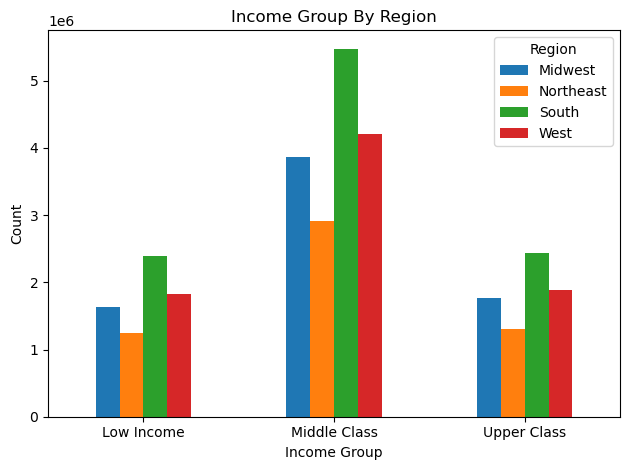

In [211]:
# Creating bar graph for income groups based on region
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [213]:
# Exporting bar graph
income_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_comparison_bar.png'))

In [215]:
# Creating crosstab for dependents_group and region
dependent_group_region_comparison=pd.crosstab(cust_ords_prods_excluded['dependents_group'],cust_ords_prods_excluded['region'],dropna=False)

In [216]:
dependent_group_region_comparison

region,Midwest,Northeast,South,West
dependents_group,,,,
Average,1809994,1351961,2603717,1967589
Large,1787286,1381233,2585864,2018133
Low,3664233,2731491,5121558,3941505


<Figure size 1000x700 with 0 Axes>

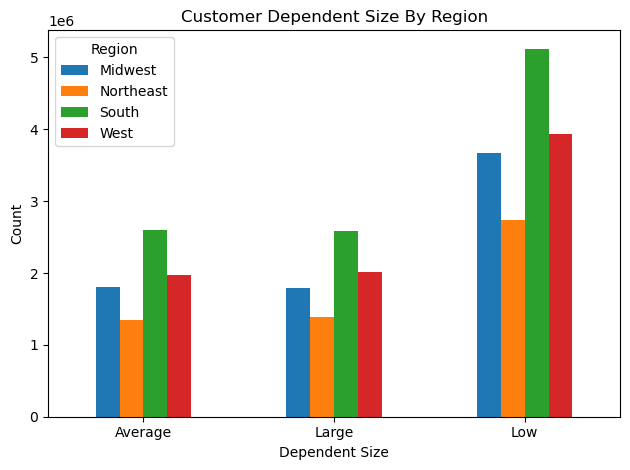

In [221]:
# Creating bar grap for dependant_group and region Comparison
plt.figure(figsize=(10, 7))
dependent_group_region_comparison_bar= dependent_group_region_comparison.plot(kind='bar',rot=0)
plt.title('Customer Dependent Size By Region')
plt.xlabel('Dependent Size')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [223]:
# Exporting bar graph
dependent_group_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependent_group_region_comparison_bar.png'))

In [225]:
cust_ords_prods_excluded.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,region,activity_level,age_group,income_group,dependents_group,order_dow_weekend,dependents_flag,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,Midwest,high-activity customer,Senior,Low Income,Low,Weekend,Has dependents,"married, Has dependents"
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,Midwest,high-activity customer,Senior,Low Income,Low,Weekend,Has dependents,"married, Has dependents"
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,married,158302,Northeast,high-activity customer,Senior,Upper Class,Average,Weekend,Has dependents,"married, Has dependents"
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,married,57797,West,high-activity customer,Middle-Age Adult,Low Income,Average,Weekday,Has dependents,"married, Has dependents"
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,living with parents and siblings,34171,South,high-activity customer,Young Adult,Low Income,Large,Weekday,Has dependents,"living with parents and siblings, Has dependents"


In [228]:
# Creating crosstab for order_dow_weekend by Region
week_day_weekend_region_comparison=pd.crosstab(cust_ords_prods_excluded['order_dow_weekend'],cust_ords_prods_excluded['region'],dropna=False)

In [229]:
week_day_weekend_region_comparison

region,Midwest,Northeast,South,West
order_dow_weekend,,,,
Weekday,4861238,3670705,6926083,5306624
Weekend,2400275,1793980,3385056,2620603


<Figure size 1000x700 with 0 Axes>

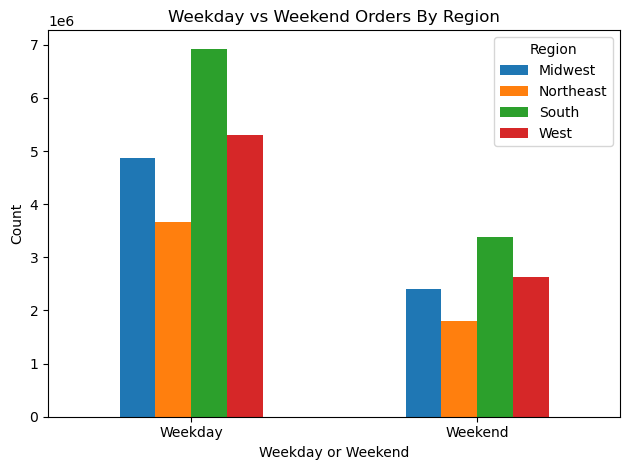

In [232]:
# Creating bar grap for weekday vs weekend By Region Comparison
plt.figure(figsize=(10, 7))
week_day_weekend_region_comparison_bar= week_day_weekend_region_comparison.plot(kind='bar',rot=0)
plt.title('Weekday vs Weekend Orders By Region')
plt.xlabel('Weekday or Weekend')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [234]:
# Exporting bar graph
week_day_weekend_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_weekend_region_comparison_bar.png'))

In [236]:
# Creating crosstab for customer frequency and region
region_customer_frequency_comparison = pd.crosstab(cust_ords_prods_excluded['region'], cust_ords_prods_excluded['frequency_flag'])

In [237]:
region_customer_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


<Figure size 1000x700 with 0 Axes>

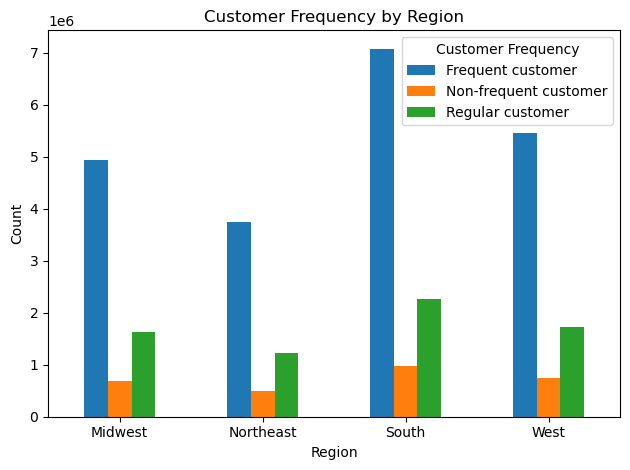

In [242]:
# Creating bar grap for customer frequency by region
plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar= region_customer_frequency_comparison.plot(kind='bar',rot=0)
plt.title('Customer Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Frequency')
plt.tight_layout()
plt.show()

In [244]:
# Exporting bar graph
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_frequency_comparison_bar.png'))

In [246]:
# Creating crosstab to compare region with type of spender
region_spender_type_comparison = pd.crosstab(cust_ords_prods_excluded['region'], cust_ords_prods_excluded['spending_flag'], dropna=False)

In [247]:
region_spender_type_comparison

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


<Figure size 1000x700 with 0 Axes>

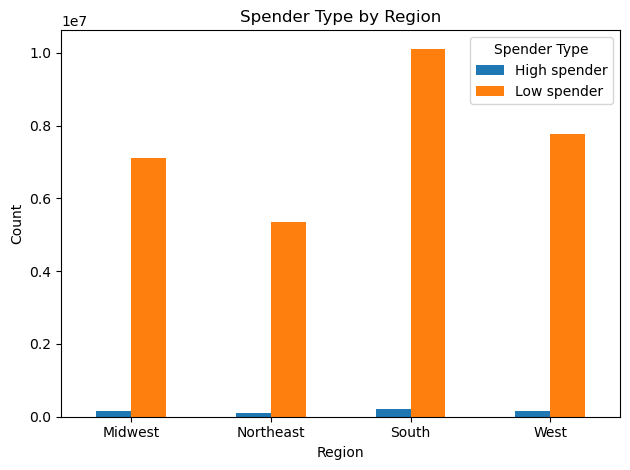

In [250]:
# Creating bar grap for type of spender by region
plt.figure(figsize=(10, 7))
region_spender_type_comparison_bar= region_spender_type_comparison.plot(kind='bar',rot=0)
plt.title('Spender Type by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Spender Type')
plt.tight_layout()
plt.show()

In [252]:
# Exporting bar graph
region_spender_type_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_spender_type_comparison_bar.png'))

# 08. Comparing customer profiles with departments

In [257]:
#Importing department wrangled dataframe
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [259]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [261]:
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [263]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [265]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [267]:
# Changing department_id from int64 to str for merge
df_dept['department_id'] = df_dept['department_id'].astype('float64')

In [269]:
cust_ords_prods_excluded.columns.to_list()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'first_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_price',
 'spending_flag',
 'median_days_between_orders',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependents',
 'marital_status',
 'income',
 'region',
 'activity_level',
 'age_group',
 'income_group',
 'dependents_group',
 'order_dow_weekend',
 'dependents_flag',
 'customer_profile']

In [271]:
cust_ords_prods_excluded.shape

(30964564, 39)

In [273]:
df_final_dept = cust_ords_prods_excluded.merge(df_dept, on='department_id', indicator=True)

In [274]:
df_final_dept

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,region,activity_level,age_group,income_group,dependents_group,order_dow_weekend,dependents_flag,customer_profile,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Midwest,high-activity customer,Senior,Low Income,Low,Weekend,Has dependents,"married, Has dependents",snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Midwest,high-activity customer,Senior,Low Income,Low,Weekend,Has dependents,"married, Has dependents",snacks,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Northeast,high-activity customer,Senior,Upper Class,Average,Weekend,Has dependents,"married, Has dependents",snacks,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,West,high-activity customer,Middle-Age Adult,Low Income,Average,Weekday,Has dependents,"married, Has dependents",snacks,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,South,high-activity customer,Young Adult,Low Income,Large,Weekday,Has dependents,"living with parents and siblings, Has dependents",snacks,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,...,South,high-activity customer,Middle-Age Adult,Middle Class,Low,Weekday,Has dependents,"married, Has dependents",personal care,both
30964560,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,...,Northeast,high-activity customer,Middle-Age Adult,Upper Class,Low,Weekend,Has dependents,"married, Has dependents",personal care,both
30964561,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,Midwest,high-activity customer,Middle-Age Adult,Middle Class,Low,Weekday,Has dependents,"married, Has dependents",personal care,both
30964562,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,Midwest,high-activity customer,Middle-Age Adult,Middle Class,Low,Weekday,Has dependents,"married, Has dependents",personal care,both


In [276]:
# Dropping merge column
df_final_dept = df_final_dept.drop(columns=['_merge'])

In [277]:
# Exporting new dataframe with department merged to main dataframe
df_final_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customer_department_merge.pkl'))

In [278]:
df_final_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

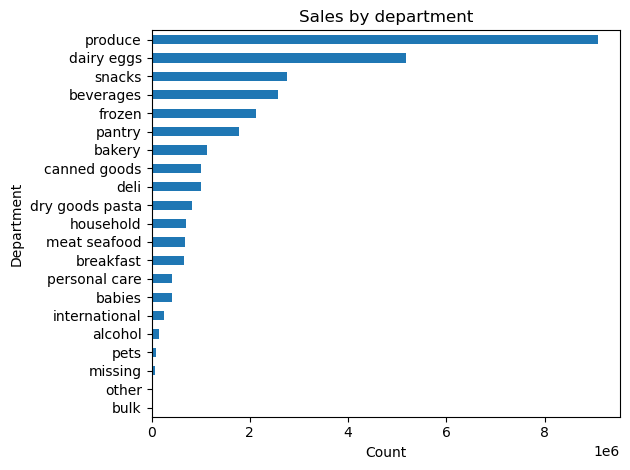

In [280]:
# Creating department bar graph
dept_bar = df_final_dept['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Sales by department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [281]:
# Exporting bar graph
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

In [288]:
# Creating crosstab to compare age_group with departments
age_department_comparison=pd.crosstab(df_final_dept['age_group'],df_final_dept['department'],dropna=False)

In [290]:
age_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adult,42167,123044,334154,754851,198803,9902,302479,1549127,299970,243702,...,207553,76675,199124,19130,10198,529307,125522,27034,2712590,824677
Middle-Age Adult,46579,129910,350804,814687,211274,10298,315774,1612490,314110,256920,...,218860,79743,209927,20340,10811,558929,134736,28293,2830853,867564
Senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
Young Adult,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616


<Figure size 2500x2500 with 0 Axes>

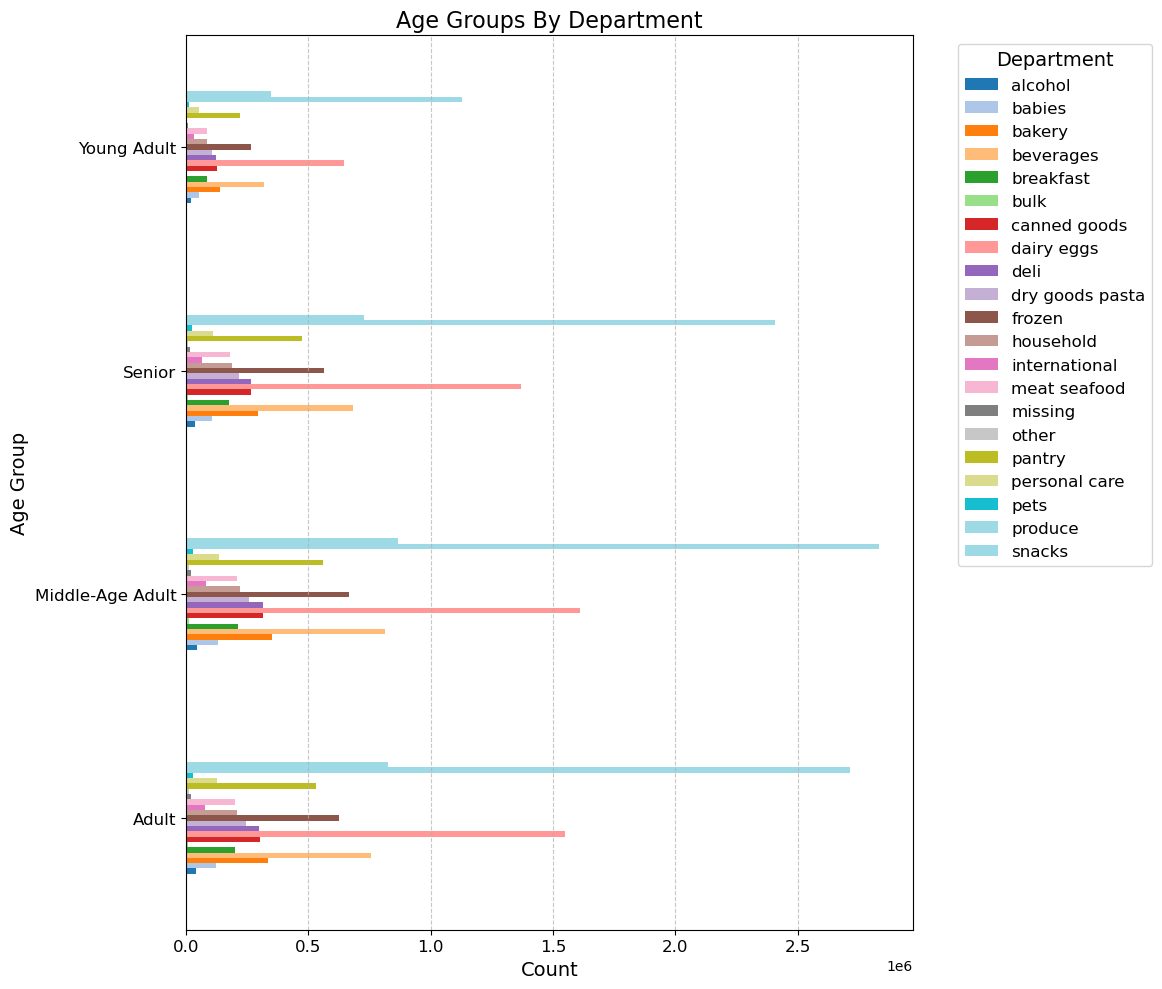

In [292]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [296]:
# Exporting bar graph
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

In [298]:
# Creating crosstab to compare income_group with departments
income_group_department_comparison=pd.crosstab(df_final_dept['income_group'],df_final_dept['department'],dropna=False)

In [299]:
income_group_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
Low Income,34383,73943,241396,693630,174107,8787,200464,1122385,227449,162565,...,169424,52428,112824,14494,7898,381168,99237,19285,1934564,910575
Middle Class,70707,234170,601909,1288547,341053,17334,557558,2796510,535986,456516,...,360191,141027,387387,34707,18148,964083,223092,49565,4959745,1279736
Upper Class,39537,102279,277523,589724,155690,7330,254052,1258287,240399,203055,...,170242,62536,174570,15567,8365,437454,101977,24210,2184964,576095


<Figure size 1800x1200 with 0 Axes>

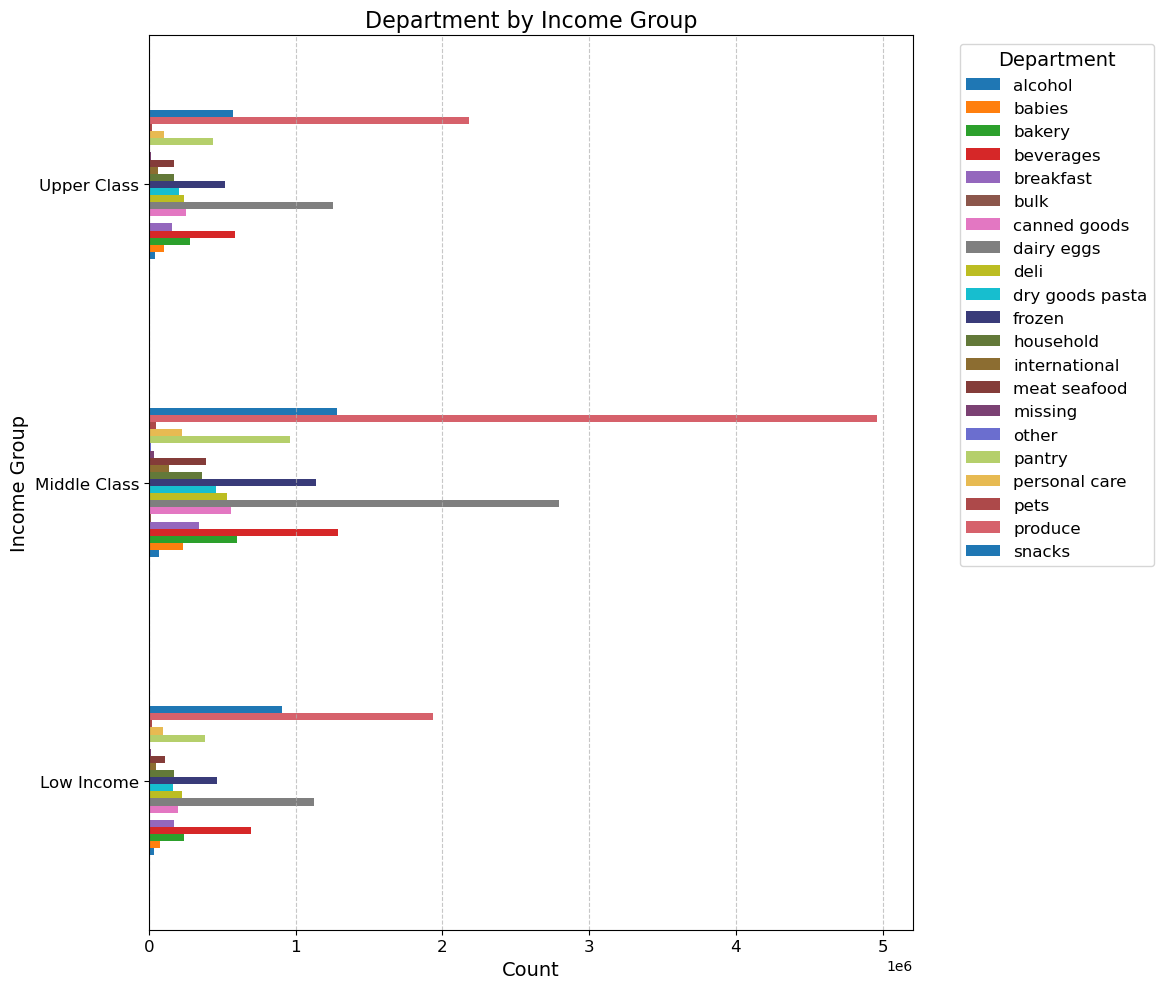

In [312]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh',
    figsize=(14, 10),
    color=custom_colors,
    rot=0
)

# Add title and labels with larger font size
plt.title('Department by Income Group', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [314]:
# Exporting bar graph
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_department_comparison_bar.png'))

In [316]:
# Creating crosstab to compare regions with departments
region_dept_comparison = pd.crosstab(df_final_dept['region'], df_final_dept['department'], dropna = False)

In [317]:
region_dept_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


<Figure size 1000x800 with 0 Axes>

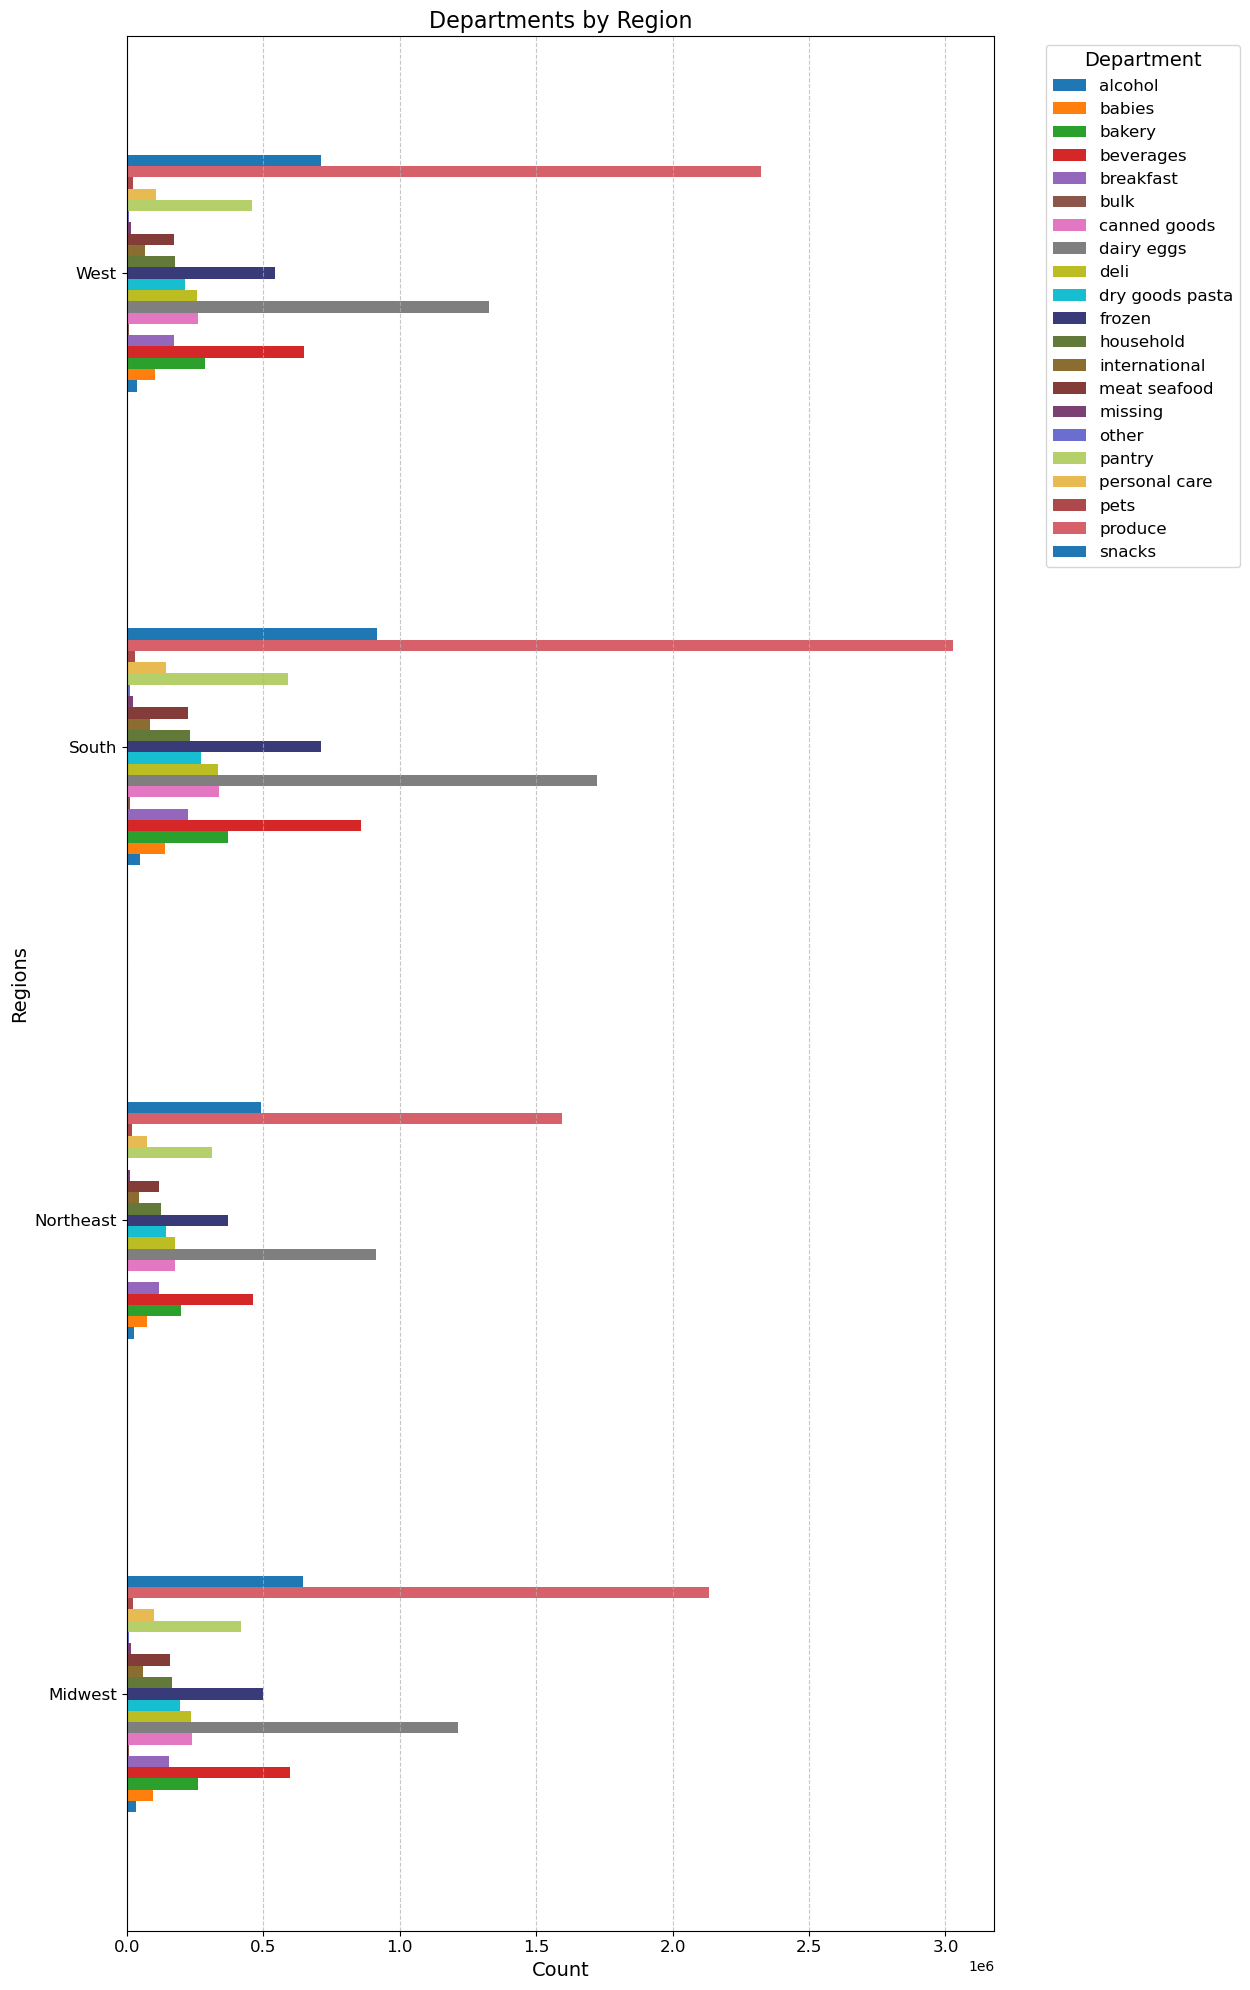

In [318]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

plt.figure(figsize=(10, 8))
region_dept_comparison_bar = region_dept_comparison.plot(kind='barh', figsize=(15, 20), color = custom_colors, rot=0)

# Add title and labels with larger font size
plt.title('Departments by Region', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [322]:
# Exporting Regions by Department Bar Chart
region_dept_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region_dept_compparison_bar.png'))

# 09. Additional Graphs for project analysis

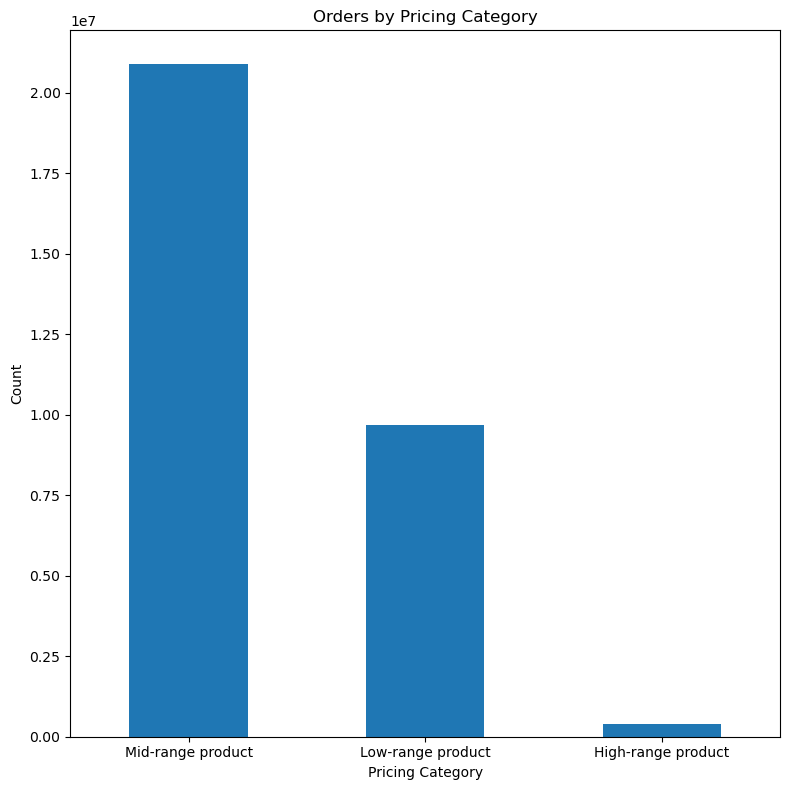

In [353]:
# Creating bar graph for price category
plt.figure(figsize=(8,8))
price_category_bar= cust_ords_prods_excluded['price_range_loc'].value_counts().plot(kind='bar', rot=0)
plt.title('Orders by Pricing Category')
plt.xlabel('Pricing Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [355]:
# Exporting graph
price_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','price_category_bar.png'))

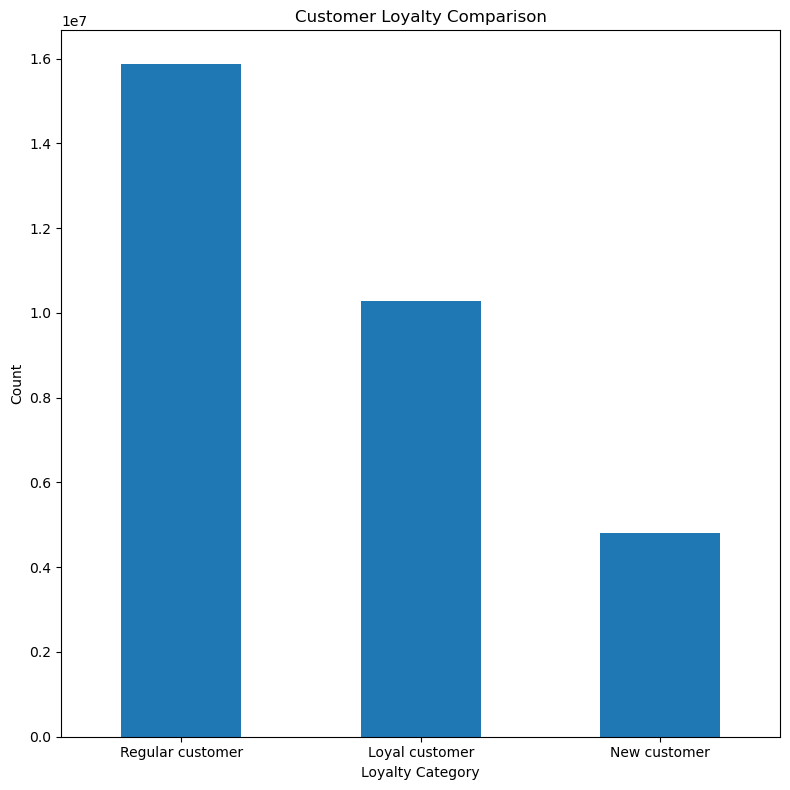

In [357]:
# Creating bar graph for customer loyalty breakdown
plt.figure(figsize = (8,8))
loyalty_customer_comparison_bar = cust_ords_prods_excluded['loyalty_flag'].value_counts().plot(kind = 'bar', rot = 0)
plt.title('Customer Loyalty Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [359]:
# Exporting graph
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_bar.png'))

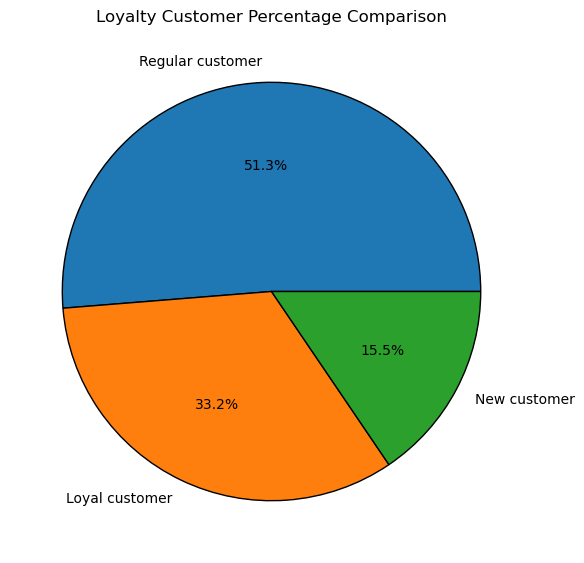

In [361]:
# Creating pie Chart of customer loyalty breakdown
loyalty_customer_pie = cust_ords_prods_excluded['loyalty_flag'].value_counts()
plt.figure(figsize = (6,6))
loyalty_customer_comparison_pie = loyalty_customer_pie.plot.pie(autopct = '%.1f%%', wedgeprops = {'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [363]:
# Exporting graph
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_pie.png'))